# Project 2: World Happiness Report.

## Importing libraries.

In [1258]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re
import pandas as pd
from pandas import json_normalize

import requests 
import json
import os
from dotenv import load_dotenv
import time
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gp


In [496]:
df = pd.read_csv('Happiness.csv')

## Api request.

In [467]:

import requests

url = "https://countriesnow.space/api/v0.1/countries/population/filter"

payload = "{\n\t\"year\": 2000,\n\t\"limit\": 10,\n\t\"lt\": 651348588,\n\t\"gt\": 6513485,\n\t\"orderBy\": \"name\",\n\t\"order\": \"dsc\"\n}"
headers = {}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)


{"error":false,"msg":"filtered result","data":[{"country":"Tuvalu","code":"TUV","populationCounts":{"year":2018,"value":11508}},{"country":"Nauru","code":"NRU","populationCounts":{"year":2018,"value":12704}},{"country":"Palau","code":"PLW","populationCounts":{"year":2018,"value":17907}},{"country":"British Virgin Islands","code":"VGB","populationCounts":{"year":2018,"value":29802}},{"country":"Gibraltar","code":"GIB","populationCounts":{"year":2018,"value":33718}},{"country":"San Marino","code":"SMR","populationCounts":{"year":2018,"value":33785}},{"country":"St. Martin (French part)","code":"MAF","populationCounts":{"year":2018,"value":37264}},{"country":"Turks and Caicos Islands","code":"TCA","populationCounts":{"year":2018,"value":37665}},{"country":"Liechtenstein","code":"LIE","populationCounts":{"year":2018,"value":37910}},{"country":"Monaco","code":"MCO","populationCounts":{"year":2018,"value":38682}},{"country":"Sint Maarten (Dutch part)","code":"SXM","populationCounts":{"year":

In [345]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [346]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [349]:
response.content

b'{"error":false,"msg":"filtered result","data":[{"country":"Tuvalu","code":"TUV","populationCounts":{"year":2018,"value":11508}},{"country":"Nauru","code":"NRU","populationCounts":{"year":2018,"value":12704}},{"country":"Palau","code":"PLW","populationCounts":{"year":2018,"value":17907}},{"country":"British Virgin Islands","code":"VGB","populationCounts":{"year":2018,"value":29802}},{"country":"Gibraltar","code":"GIB","populationCounts":{"year":2018,"value":33718}},{"country":"San Marino","code":"SMR","populationCounts":{"year":2018,"value":33785}},{"country":"St. Martin (French part)","code":"MAF","populationCounts":{"year":2018,"value":37264}},{"country":"Turks and Caicos Islands","code":"TCA","populationCounts":{"year":2018,"value":37665}},{"country":"Liechtenstein","code":"LIE","populationCounts":{"year":2018,"value":37910}},{"country":"Monaco","code":"MCO","populationCounts":{"year":2018,"value":38682}},{"country":"Sint Maarten (Dutch part)","code":"SXM","populationCounts":{"year

## Getting a Dataframe from the API.

In [350]:
pop = response.json()
pop

{'error': False,
 'msg': 'filtered result',
 'data': [{'country': 'Tuvalu',
   'code': 'TUV',
   'populationCounts': {'year': 2018, 'value': 11508}},
  {'country': 'Nauru',
   'code': 'NRU',
   'populationCounts': {'year': 2018, 'value': 12704}},
  {'country': 'Palau',
   'code': 'PLW',
   'populationCounts': {'year': 2018, 'value': 17907}},
  {'country': 'British Virgin Islands',
   'code': 'VGB',
   'populationCounts': {'year': 2018, 'value': 29802}},
  {'country': 'Gibraltar',
   'code': 'GIB',
   'populationCounts': {'year': 2018, 'value': 33718}},
  {'country': 'San Marino',
   'code': 'SMR',
   'populationCounts': {'year': 2018, 'value': 33785}},
  {'country': 'St. Martin (French part)',
   'code': 'MAF',
   'populationCounts': {'year': 2018, 'value': 37264}},
  {'country': 'Turks and Caicos Islands',
   'code': 'TCA',
   'populationCounts': {'year': 2018, 'value': 37665}},
  {'country': 'Liechtenstein',
   'code': 'LIE',
   'populationCounts': {'year': 2018, 'value': 37910}},
  

In [351]:
df1 = pd.DataFrame(pop)


In [352]:
df1

,error,msg,data
0,False,filtered result,"{'country': 'Tuvalu', 'code': 'TUV', 'populati..."
1,False,filtered result,"{'country': 'Nauru', 'code': 'NRU', 'populatio..."
2,False,filtered result,"{'country': 'Palau', 'code': 'PLW', 'populatio..."
3,False,filtered result,"{'country': 'British Virgin Islands', 'code': ..."
4,False,filtered result,"{'country': 'Gibraltar', 'code': 'GIB', 'popul..."
...,...,...,...
257,False,filtered result,"{'country': 'IBRD only', 'code': 'IBD', 'popul..."
258,False,filtered result,"{'country': 'Middle income', 'code': 'MIC', 'p..."
259,False,filtered result,"{'country': 'Low & middle income', 'code': 'LM..."
260,False,filtered result,"{'country': 'IDA & IBRD total', 'code': 'IBT',..."


In [1248]:
df2=pd.DataFrame(pop['data'])

In [1250]:
df2

,country,code,populationCounts
0,Tuvalu,TUV,"{'year': 2018, 'value': 11508}"
1,Nauru,NRU,"{'year': 2018, 'value': 12704}"
2,Palau,PLW,"{'year': 2018, 'value': 17907}"
3,British Virgin Islands,VGB,"{'year': 2018, 'value': 29802}"
4,Gibraltar,GIB,"{'year': 2018, 'value': 33718}"
...,...,...,...
257,IBRD only,IBD,"{'year': 2018, 'value': 4772284113}"
258,Middle income,MIC,"{'year': 2018, 'value': 5678540888}"
259,Low & middle income,LMY,"{'year': 2018, 'value': 6383958209}"
260,IDA & IBRD total,IBT,"{'year': 2018, 'value': 6412522234}"


## Extracting the values needed from dataframe.

In [1249]:
df_values=df2['populationCounts'].apply(pd.Series)

In [355]:
df_values

,year,value
0,2018,11508
1,2018,12704
2,2018,17907
3,2018,29802
4,2018,33718
...,...,...
257,2018,4772284113
258,2018,5678540888
259,2018,6383958209
260,2018,6412522234


In [356]:
df2['Pop']=df_values['value']

In [357]:
Data_w_pop=df2

In [358]:
Data_w_pop

,country,code,populationCounts,Pop
0,Tuvalu,TUV,"{'year': 2018, 'value': 11508}",11508
1,Nauru,NRU,"{'year': 2018, 'value': 12704}",12704
2,Palau,PLW,"{'year': 2018, 'value': 17907}",17907
3,British Virgin Islands,VGB,"{'year': 2018, 'value': 29802}",29802
4,Gibraltar,GIB,"{'year': 2018, 'value': 33718}",33718
...,...,...,...,...
257,IBRD only,IBD,"{'year': 2018, 'value': 4772284113}",4772284113
258,Middle income,MIC,"{'year': 2018, 'value': 5678540888}",5678540888
259,Low & middle income,LMY,"{'year': 2018, 'value': 6383958209}",6383958209
260,IDA & IBRD total,IBT,"{'year': 2018, 'value': 6412522234}",6412522234


## Opening a new Dataframe to extract more info.

In [517]:
dfsize=pd.read_csv('population_by_country_2022.csv')

In [521]:
dfsize

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [524]:
dfsize2= dfsize[['Density (P/Km²)', 'Land Area (Km²)','Country (or dependency)']]

In [525]:
dfsize2

,Density (P/Km²),Land Area (Km²),Country (or dependency)
0,153,9388211,China
1,464,2973190,India
2,36,9147420,United States
3,151,1811570,Indonesia
4,287,770880,Pakistan
...,...,...,...
230,50,100,Montserrat
231,0,12170,Falkland Islands
232,6,260,Niue
233,136,10,Tokelau


In [385]:
df['Test']=Data['country']

## Functions.

In [582]:
def dropcolumn(df,column):
    df.drop(f"{column}", axis = 1, inplace = True)
    
    return df

In [447]:
def droprow(df,row):
    df.drop(index=row, axis=1, inplace=True) 
    
    return df

In [681]:
def replace_value(df,column,old_value,new_value):
    df[column] = df[column].str.replace(old_value,new_value)
    return df
replace_value(dff,'Region','Southeastern Asia','Asia')
    
    
        



,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Population,Density (P/Km²),Land Area (Km²),country,suicide rate per 100.000
Happiness Rank,,,,,,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8513227,219,39516,Switzerland,14.5
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,352721,3,100250,Iceland,11.9
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5793636,137,42430,Denmark,10.7
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5311916,15,365268,Norway,11.8
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,37057765,4,9093510,Canada,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Afghanistan,Southern Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,37172386,60,652860,Afghanistan,4.1
154,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,12301939,525,24670,Rwanda,5.6
155,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,11485048,108,112760,Benin,7.8


In [1251]:
#df_m=df.merge(Data, left_on='Country', right_on='country')


In [548]:
def merge(df1,df2,column1,column2):
    df_mer=df1.merge(df2, left_on=f"{column1}", right_on=f"{column2}")
    return df_mer

## Cleaning and tidying.

In [360]:
dropcolumn(Data_w_pop,'code')

,country,populationCounts,Pop
0,Tuvalu,"{'year': 2018, 'value': 11508}",11508
1,Nauru,"{'year': 2018, 'value': 12704}",12704
2,Palau,"{'year': 2018, 'value': 17907}",17907
3,British Virgin Islands,"{'year': 2018, 'value': 29802}",29802
4,Gibraltar,"{'year': 2018, 'value': 33718}",33718
...,...,...,...
257,IBRD only,"{'year': 2018, 'value': 4772284113}",4772284113
258,Middle income,"{'year': 2018, 'value': 5678540888}",5678540888
259,Low & middle income,"{'year': 2018, 'value': 6383958209}",6383958209
260,IDA & IBRD total,"{'year': 2018, 'value': 6412522234}",6412522234


In [361]:
dropcolumn(Data_w_pop,'populationCounts')

,country,Pop
0,Tuvalu,11508
1,Nauru,12704
2,Palau,17907
3,British Virgin Islands,29802
4,Gibraltar,33718
...,...,...
257,IBRD only,4772284113
258,Middle income,5678540888
259,Low & middle income,6383958209
260,IDA & IBRD total,6412522234


In [458]:
dropcolumn(df,'new_country')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Test
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Tuvalu
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Nauru
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Palau
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,British Virgin Islands
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Gibraltar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Guatemala
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Zambia
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Malawi
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Kazakhstan


In [469]:
dropcolumn(df_m,'country')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Pop
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8513227
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,352721
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5793636
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5311916
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,37057765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,37172386
134,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,12301939
135,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,11485048
136,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,11175378


In [459]:
dropcolumn(df,'Test')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [380]:
Data

,country,Pop
181,Afghanistan,37172386
80,Albania,2866376
186,Algeria,42228429
13,American Samoa,55465
20,Andorra,77006
...,...,...
92,West Bank and Gaza,4569087
261,World,7594270356
169,"Yemen, Rep.",28498687
154,Zambia,17351822


In [463]:
df_m.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'country', 'Pop'],
      dtype='object')

In [472]:
df_m.rename(columns={'Pop': 'Population'}, inplace=True)

In [530]:
dropcolumn(df_f,'Country (or dependency)')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Population,Density (P/Km²),Land Area (Km²)
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8513227,219,39516
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,352721,3,100250
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5793636,137,42430
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5311916,15,365268
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,37057765,4,9093510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,37172386,60,652860
132,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,12301939,525,24670
133,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,11485048,108,112760
134,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,11175378,463,25680


In [556]:
df_s = pd.read_csv('suicide.csv')

In [557]:
df_s

,country,rate2019both,rate2019male,rate2019female
0,Lesotho,72.4,116.0,30.1
1,Guyana,40.3,63.0,17.4
2,Eswatini,29.4,55.1,4.7
3,South Korea,28.6,40.2,16.9
4,Kiribati,28.3,48.6,8.7
...,...,...,...,...
174,Sao Tome and Principe,1.5,2.2,0.8
175,Saint Vincent and the Grenadines,1.0,1.3,0.6
176,Grenada,0.7,0.6,0.7
177,Barbados,0.6,0.9,0.3


In [691]:
dff.Region.value_counts()

Europe                                         43
Sub-Saharan Africa                             35
Latin America and Caribbean                    21
Asia                                           18
Middle East and Northern Sub-Saharan Africa    15
North America                                   2
Australia and New Zealand                       2
Name: Region, dtype: int64

In [690]:
replace_value(dff,'Region','Western Europe','Europe')

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Population,Density (P/Km²),Land Area (Km²),country,suicide rate per 100.000
Happiness Rank,,,,,,,,,,,,,,,,
1,Switzerland,Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8513227,219,39516,Switzerland,14.5
2,Iceland,Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,352721,3,100250,Iceland,11.9
3,Denmark,Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5793636,137,42430,Denmark,10.7
4,Norway,Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5311916,15,365268,Norway,11.8
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,37057765,4,9093510,Canada,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Afghanistan,Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,37172386,60,652860,Afghanistan,4.1
154,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,12301939,525,24670,Rwanda,5.6
155,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,11485048,108,112760,Benin,7.8


In [689]:
replace_value(dff,'Region','Africa','Sub-Saharan Africa')

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Population,Density (P/Km²),Land Area (Km²),country,suicide rate per 100.000
Happiness Rank,,,,,,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8513227,219,39516,Switzerland,14.5
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,352721,3,100250,Iceland,11.9
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5793636,137,42430,Denmark,10.7
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5311916,15,365268,Norway,11.8
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,37057765,4,9093510,Canada,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Afghanistan,Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,37172386,60,652860,Afghanistan,4.1
154,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,12301939,525,24670,Rwanda,5.6
155,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,11485048,108,112760,Benin,7.8


In [685]:
replace_value(dff,'Region','Southern Asia','Asia')

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Population,Density (P/Km²),Land Area (Km²),country,suicide rate per 100.000
Happiness Rank,,,,,,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8513227,219,39516,Switzerland,14.5
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,352721,3,100250,Iceland,11.9
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5793636,137,42430,Denmark,10.7
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5311916,15,365268,Norway,11.8
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,37057765,4,9093510,Canada,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Afghanistan,Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,37172386,60,652860,Afghanistan,4.1
154,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,12301939,525,24670,Rwanda,5.6
155,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,11485048,108,112760,Benin,7.8


In [683]:
replace_value(dff,'Region','Eastern Asia','Asia')

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Population,Density (P/Km²),Land Area (Km²),country,suicide rate per 100.000
Happiness Rank,,,,,,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8513227,219,39516,Switzerland,14.5
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,352721,3,100250,Iceland,11.9
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5793636,137,42430,Denmark,10.7
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5311916,15,365268,Norway,11.8
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,37057765,4,9093510,Canada,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Afghanistan,Southern Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,37172386,60,652860,Afghanistan,4.1
154,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,12301939,525,24670,Rwanda,5.6
155,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,11485048,108,112760,Benin,7.8


## Merging Dataframes.

In [528]:
df_f=df_m.merge(dfsize2, left_on='Country', right_on='Country (or dependency)')

In [559]:
dff=merge(df_f,df_s,'Country','country')

In [568]:
dff.rename(columns={'rate2019both': 'suicide rate per 100.000'}, inplace=True)

In [583]:
dropcolumn(dff,'rate2019male')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Population,Density (P/Km²),Land Area (Km²),country,suicide rate per 100.000,rate2019female
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8513227,219,39516,Switzerland,14.5,9.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,352721,3,100250,Iceland,11.9,3.9
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5793636,137,42430,Denmark,10.7,6.5
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5311916,15,365268,Norway,11.8,7.7
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,37057765,4,9093510,Canada,11.8,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,37172386,60,652860,Afghanistan,4.1,3.6
132,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,12301939,525,24670,Rwanda,5.6,3.0
133,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,11485048,108,112760,Benin,7.8,3.8
134,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,11175378,463,25680,Burundi,6.2,3.4


In [626]:
dff.set_index('Happiness Rank',inplace=True)

In [622]:
dff.reset_index(drop=True)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Population,Density (P/Km²),Land Area (Km²),country,suicide rate per 100.000
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8513227,219,39516,Switzerland,14.5
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,352721,3,100250,Iceland,11.9
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5793636,137,42430,Denmark,10.7
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5311916,15,365268,Norway,11.8
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,37057765,4,9093510,Canada,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,37172386,60,652860,Afghanistan,4.1
132,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,12301939,525,24670,Rwanda,5.6
133,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,11485048,108,112760,Benin,7.8
134,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,11175378,463,25680,Burundi,6.2


In [697]:
dropcolumn(dff,'Generosity')

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Population,Density (P/Km²),Land Area (Km²),suicide rate per 100.000
Happiness Rank,,,,,,,,,,,
1,Switzerland,Europe,7.587,1.39651,0.94143,0.66557,0.41978,8513227,219,39516,14.5
2,Iceland,Europe,7.561,1.30232,0.94784,0.62877,0.14145,352721,3,100250,11.9
3,Denmark,Europe,7.527,1.32548,0.87464,0.64938,0.48357,5793636,137,42430,10.7
4,Norway,Europe,7.522,1.45900,0.88521,0.66973,0.36503,5311916,15,365268,11.8
5,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,37057765,4,9093510,11.8
...,...,...,...,...,...,...,...,...,...,...,...
153,Afghanistan,Asia,3.575,0.31982,0.30335,0.23414,0.09719,37172386,60,652860,4.1
154,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.42864,0.59201,0.55191,12301939,525,24670,5.6
155,Benin,Sub-Saharan Africa,3.340,0.28665,0.31910,0.48450,0.08010,11485048,108,112760,7.8


In [696]:
dropcolumn(dff,'country')

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population,Density (P/Km²),Land Area (Km²),suicide rate per 100.000
Happiness Rank,,,,,,,,,,,,
1,Switzerland,Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,8513227,219,39516,14.5
2,Iceland,Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,352721,3,100250,11.9
3,Denmark,Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,5793636,137,42430,10.7
4,Norway,Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,5311916,15,365268,11.8
5,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,37057765,4,9093510,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Afghanistan,Asia,3.575,0.31982,0.30335,0.23414,0.09719,0.36510,37172386,60,652860,4.1
154,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.42864,0.59201,0.55191,0.22628,12301939,525,24670,5.6
155,Benin,Sub-Saharan Africa,3.340,0.28665,0.31910,0.48450,0.08010,0.18260,11485048,108,112760,7.8


In [584]:
dropcolumn(dff,'rate2019female')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Population,Density (P/Km²),Land Area (Km²),country,suicide rate per 100.000
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8513227,219,39516,Switzerland,14.5
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,352721,3,100250,Iceland,11.9
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,5793636,137,42430,Denmark,10.7
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,5311916,15,365268,Norway,11.8
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,37057765,4,9093510,Canada,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,37172386,60,652860,Afghanistan,4.1
132,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,12301939,525,24670,Rwanda,5.6
133,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,11485048,108,112760,Benin,7.8
134,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,11175378,463,25680,Burundi,6.2


In [695]:
dropcolumn(dff,'Family')

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population,Density (P/Km²),Land Area (Km²),country,suicide rate per 100.000
Happiness Rank,,,,,,,,,,,,,
1,Switzerland,Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,8513227,219,39516,Switzerland,14.5
2,Iceland,Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,352721,3,100250,Iceland,11.9
3,Denmark,Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,5793636,137,42430,Denmark,10.7
4,Norway,Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,5311916,15,365268,Norway,11.8
5,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,37057765,4,9093510,Canada,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Afghanistan,Asia,3.575,0.31982,0.30335,0.23414,0.09719,0.36510,37172386,60,652860,Afghanistan,4.1
154,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.42864,0.59201,0.55191,0.22628,12301939,525,24670,Rwanda,5.6
155,Benin,Sub-Saharan Africa,3.340,0.28665,0.31910,0.48450,0.08010,0.18260,11485048,108,112760,Benin,7.8


In [ ]:
dropcolumn(dff,'Dystopia Residual')

In [694]:
dropcolumn(dff,'Standard Error')

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population,Density (P/Km²),Land Area (Km²),country,suicide rate per 100.000
Happiness Rank,,,,,,,,,,,,,,
1,Switzerland,Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,8513227,219,39516,Switzerland,14.5
2,Iceland,Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,352721,3,100250,Iceland,11.9
3,Denmark,Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,5793636,137,42430,Denmark,10.7
4,Norway,Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,5311916,15,365268,Norway,11.8
5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,37057765,4,9093510,Canada,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Afghanistan,Asia,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,37172386,60,652860,Afghanistan,4.1
154,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,12301939,525,24670,Rwanda,5.6
155,Benin,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,11485048,108,112760,Benin,7.8


In [786]:
dff

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Population,Density (P/Km²),Land Area (Km²),suicide rate per 100.000
Happiness Rank,,,,,,,,,,,
1,Switzerland,Europe,7.587,1.39651,0.94143,0.66557,0.41978,8513227,219,39516,14.5
2,Iceland,Europe,7.561,1.30232,0.94784,0.62877,0.14145,352721,3,100250,11.9
3,Denmark,Europe,7.527,1.32548,0.87464,0.64938,0.48357,5793636,137,42430,10.7
4,Norway,Europe,7.522,1.45900,0.88521,0.66973,0.36503,5311916,15,365268,11.8
5,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,37057765,4,9093510,11.8
...,...,...,...,...,...,...,...,...,...,...,...
153,Afghanistan,Asia,3.575,0.31982,0.30335,0.23414,0.09719,37172386,60,652860,4.1
154,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.42864,0.59201,0.55191,12301939,525,24670,5.6
155,Benin,Sub-Saharan Africa,3.340,0.28665,0.31910,0.48450,0.08010,11485048,108,112760,7.8


## Subsets.

In [787]:
top_GDP= dff[dff["Economy (GDP per Capita)"] > 1.43]

In [1092]:
top_GDP

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Population,Density (P/Km²),Land Area (Km²),suicide rate per 100.000
Happiness Rank,,,,,,,,,,,
4,Norway,Europe,7.522,1.45900,0.88521,0.66973,0.36503,5311916,15,365268,11.8
17,Luxembourg,Europe,6.946,1.56391,0.91894,0.61583,0.37798,607950,242,2590,11.3
24,Singapore,Asia,6.798,1.52186,1.02525,0.54252,0.49210,5638676,8358,700,11.2
28,Qatar,Middle East and Northern Sub-Saharan Africa,6.611,1.69042,0.79733,0.64040,0.52208,2781677,248,11610,5.8
39,Kuwait,Middle East and Northern Sub-Saharan Africa,6.295,1.55422,0.72492,0.55499,0.25609,4137309,240,17820,2.9


In [1085]:
bottom_GDP= dff[dff["Economy (GDP per Capita)"] < 0.08]

In [1091]:
bottom_GDP

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Population,Density (P/Km²),Land Area (Km²),suicide rate per 100.000
Happiness Rank,,,,,,,,,,,
116,Liberia,Sub-Saharan Africa,4.571,0.07120,0.34201,0.28531,0.06232,4818977,53,96320,4.5
131,Malawi,Sub-Saharan Africa,4.292,0.01604,0.22562,0.43054,0.06977,18143315,203,94280,5.4
144,Niger,Sub-Saharan Africa,3.845,0.06940,0.29707,0.47692,0.15639,22442948,19,1266700,5.3
148,Central African Republic,Sub-Saharan Africa,3.678,0.07850,0.06699,0.48879,0.08289,4666377,8,622980,12.3
157,Burundi,Sub-Saharan Africa,2.905,0.01530,0.22396,0.11850,0.10062,11175378,463,25680,6.2


In [1093]:
df_GDP=[top_GDP,bottom_GDP]

In [1094]:
df_GDP=pd.concat(df_GDP)

In [ ]:
frees1.set_index('Happiness Rank',inplace=True)

In [1095]:
df_GDP=df.sort_values(by=["col1"], inplace = True)

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Population,Density (P/Km²),Land Area (Km²),suicide rate per 100.000
Happiness Rank,,,,,,,,,,,
4,Norway,Europe,7.522,1.45900,0.88521,0.66973,0.36503,5311916,15,365268,11.8
17,Luxembourg,Europe,6.946,1.56391,0.91894,0.61583,0.37798,607950,242,2590,11.3
24,Singapore,Asia,6.798,1.52186,1.02525,0.54252,0.49210,5638676,8358,700,11.2
28,Qatar,Middle East and Northern Sub-Saharan Africa,6.611,1.69042,0.79733,0.64040,0.52208,2781677,248,11610,5.8
39,Kuwait,Middle East and Northern Sub-Saharan Africa,6.295,1.55422,0.72492,0.55499,0.25609,4137309,240,17820,2.9
116,Liberia,Sub-Saharan Africa,4.571,0.07120,0.34201,0.28531,0.06232,4818977,53,96320,4.5
131,Malawi,Sub-Saharan Africa,4.292,0.01604,0.22562,0.43054,0.06977,18143315,203,94280,5.4
144,Niger,Sub-Saharan Africa,3.845,0.06940,0.29707,0.47692,0.15639,22442948,19,1266700,5.3
148,Central African Republic,Sub-Saharan Africa,3.678,0.07850,0.06699,0.48879,0.08289,4666377,8,622980,12.3


In [744]:
top_free=dff[dff["Freedom"] > 0.65]

In [748]:
bottom_free=dff[dff["Freedom"] < 0.11]

In [749]:
bottom_free

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Population,Density (P/Km²),Land Area (Km²),suicide rate per 100.000
Happiness Rank,,,,,,,,,,,
96,Bosnia and Herzegovina,Europe,4.949,0.83223,0.79081,0.09245,0.00227,3323929,64,51000,10.9
102,Greece,Europe,4.857,1.15406,0.88213,0.07699,0.01397,10731726,81,128900,5.1
112,Iraq,Middle East and Northern Sub-Saharan Africa,4.677,0.98549,0.60237,0.00000,0.13788,38433600,93,434320,3.6
118,Sudan,Sub-Saharan Africa,4.550,0.52107,0.36878,0.10081,0.14660,41801533,25,1765048,3.8
137,Angola,Sub-Saharan Africa,4.033,0.75778,0.16683,0.10384,0.07122,30809762,26,1246700,6.1


In [945]:
df_happy=[top_happiness,bottom_happiness]

In [947]:
df_happy=pd.concat(df_happy)

In [954]:
index=[ 'Region' , 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Population', 'Density (P/Km²)', 'Land Area (Km²)',
       'suicide rate per 100.000']



In [ ]:
for i in index:
    dropcolumn(df_happy,i)
    return( df_happy)

In [799]:
freesT=[bottom_free,top_free]

In [800]:
frees=pd.concat(freesT)

In [938]:
frees1 = frees.reset_index()

In [939]:
frees1.set_index('Happiness Rank',inplace=True)


In [942]:
frees1.sort_values(by=["Happiness Rank"], inplace = True)

In [1026]:
df_free= frees1[['Country', 'Freedom']]

In [1027]:
df_free.sort_values(by=["Freedom"], inplace = True)

C:\Users\mataf\AppData\Local\Temp\ipykernel_3636\3407006676.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1048]:
df_free

,Country,Freedom
Happiness Rank,,
112,Iraq,0.00000
102,Greece,0.07699
96,Bosnia and Herzegovina,0.09245
118,Sudan,0.10081
137,Angola,0.10384
10,Australia,0.65124
44,Uzbekistan,0.65821
8,Sweden,0.65980
1,Switzerland,0.66557


In [764]:
top_suicide=dff[dff["suicide rate per 100.000"] > 22]

In [1001]:
top_suicide= top_suicide[['Country', 'suicide rate per 100.000']]

In [1002]:
top_suicide

,Country,suicide rate per 100.000
Happiness Rank,,
40,Suriname,25.4
56,Lithuania,26.1
97,Lesotho,72.4
113,South Africa,23.5


In [767]:
bottom_suicide=dff[dff["suicide rate per 100.000"] < 2.5]

In [1003]:
bottom_suicide=bottom_suicide[['Country', 'suicide rate per 100.000']]

In [1004]:
df_suicide=[bottom_suicide,top_suicide]

In [1005]:
df_suicide=pd.concat(df_suicide)

In [1011]:
df_suicide.sort_values(by=['suicide rate per 100.000'], inplace = True)

In [1012]:
df_suicide

,Country,suicide rate per 100.000
Happiness Rank,,
82,Jordan,1.6
105,Honduras,2.1
90,Philippines,2.2
65,Jamaica,2.4
74,Indonesia,2.4
76,Turkey,2.4
113,South Africa,23.5
40,Suriname,25.4
56,Lithuania,26.1


In [727]:
top_happiness=dff.head(5)

In [1074]:
pd.concat(df_happy)

In [728]:
bottom_happiness=dff.tail(5)

In [1298]:
df_mean=pd.DataFrame(dff.groupby(['Region'])['Happiness Score','Economy (GDP per Capita)'].mean())

C:\Users\mataf\AppData\Local\Temp\ipykernel_3636\1329625517.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [1158]:
df_mean

,Happiness Score,Economy (GDP per Capita)
Region,,
Asia,5.058222,0.745738
Australia and New Zealand,7.285000,1.291880
Europe,5.938233,1.109613
Latin America and Caribbean,6.113000,0.868843
Middle East and Northern Sub-Saharan Africa,5.830667,1.176034
North America,7.273000,1.360400
Sub-Saharan Africa,4.172200,0.376411


# Visualizations

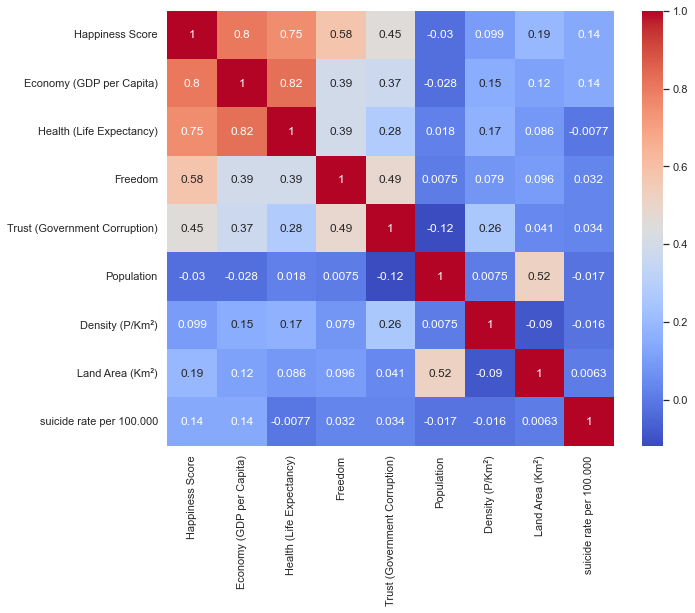

In [1332]:
plt.figure(figsize=(10,8))
HEATMAP=sns.heatmap(dff.corr(),cmap='coolwarm',annot=True);

In [1300]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (16.,6.)})
sns.set_style("whitegrid")    

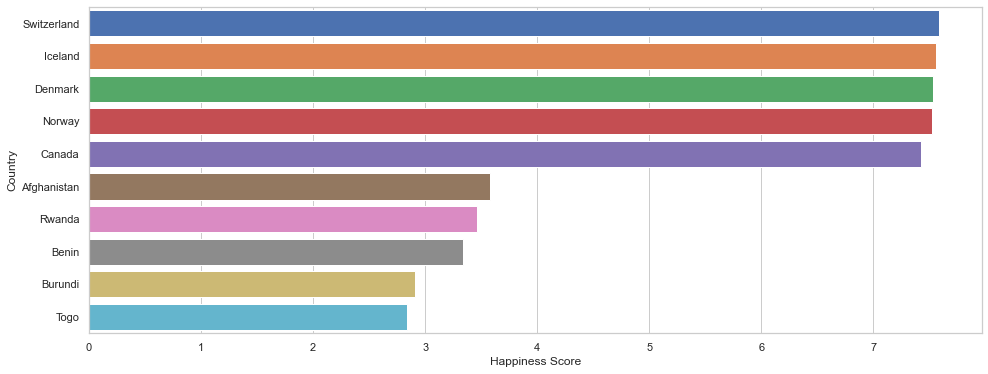

In [1301]:
HAPPYNESS=sns.barplot(data=df_happy,x='Happiness Score',y='Country',color='blue',palette='deep',saturation=1)

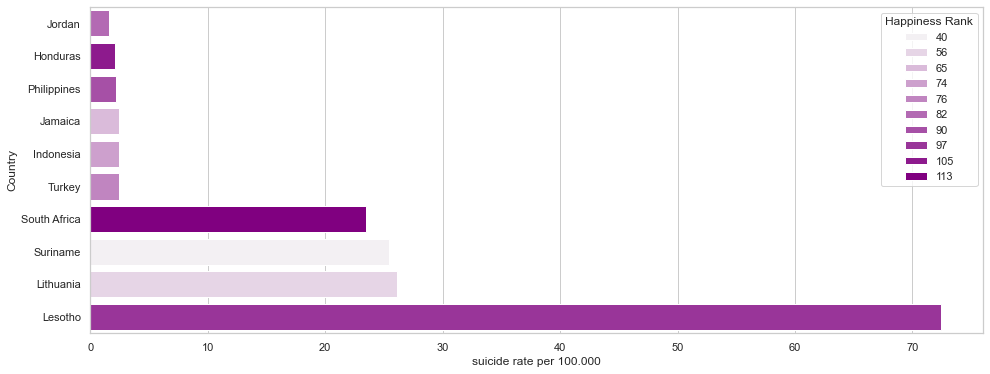

In [1302]:
SUICIDE=sns.barplot(data=df_suicide,x='suicide rate per 100.000',y='Country',color='purple',hue=df_suicide.index,saturation=20, dodge=False)

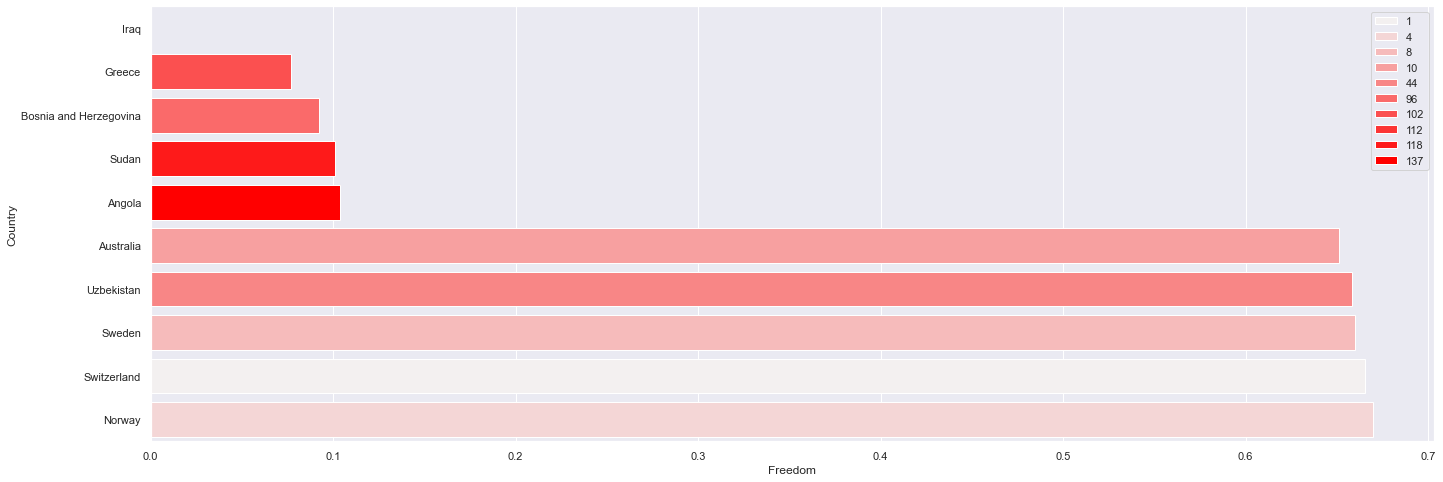

In [1303]:

sns.set(rc={"figure.figsize": (23.,8.)})
FREEDOM=sns.barplot(data=df_free,x='Freedom',y='Country',hue=df_free.index,color='red',saturation=20,dodge=False,orient='h' )
plt.legend(loc='upper right')
np.random.seed()
for i in df_freeplot.containers:
    df_freeplot.bar_label(i,)

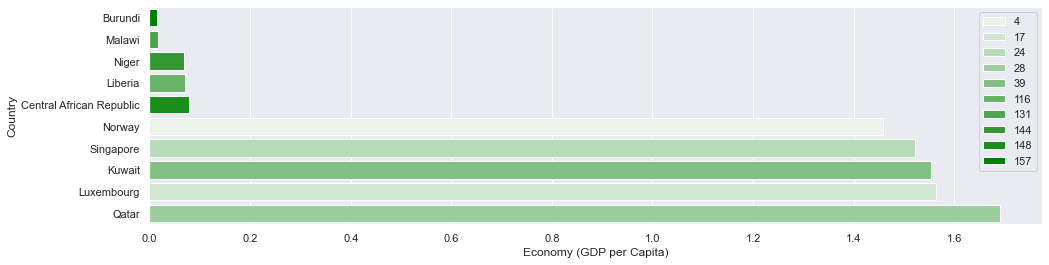

In [1364]:
sns.set(rc={"figure.figsize": (16,4)})
ECONOMY=sns.barplot(data=df_GDP,x='Economy (GDP per Capita)',y='Country',hue=df_GDP.index,color='green',saturation=20,dodge=False, )
plt.legend(loc='upper right')

In [895]:
dff.columns

Index(['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Population', 'Density (P/Km²)', 'Land Area (Km²)',
       'suicide rate per 100.000'],
      dtype='object')

In [ ]:
df_mean

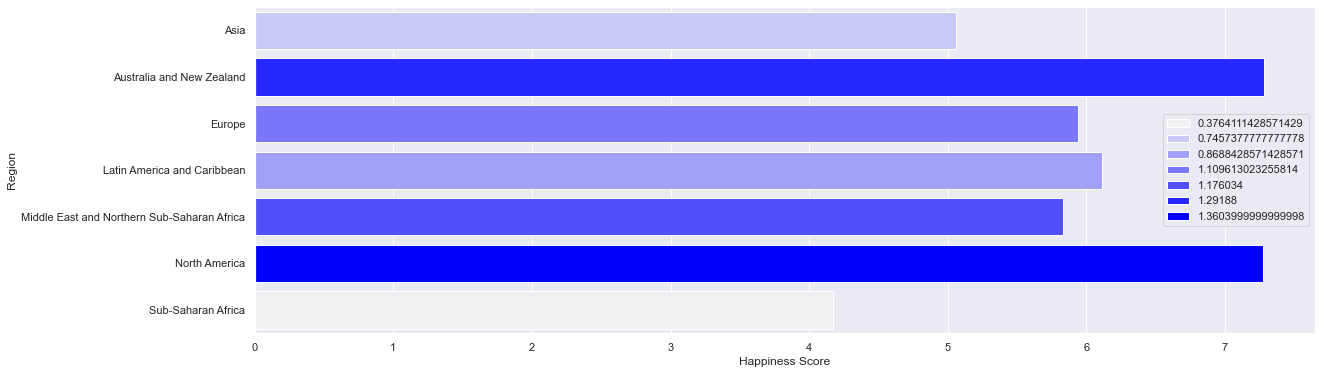

In [1306]:
sns.set(rc={"figure.figsize": (19,6)})
REGIONHAPPY=sns.barplot(data=df_mean,y=df_mean.index,x=df_mean['Happiness Score'],hue='Economy (GDP per Capita)',color='blue',saturation=20,dodge=False)
plt.legend(loc='best')

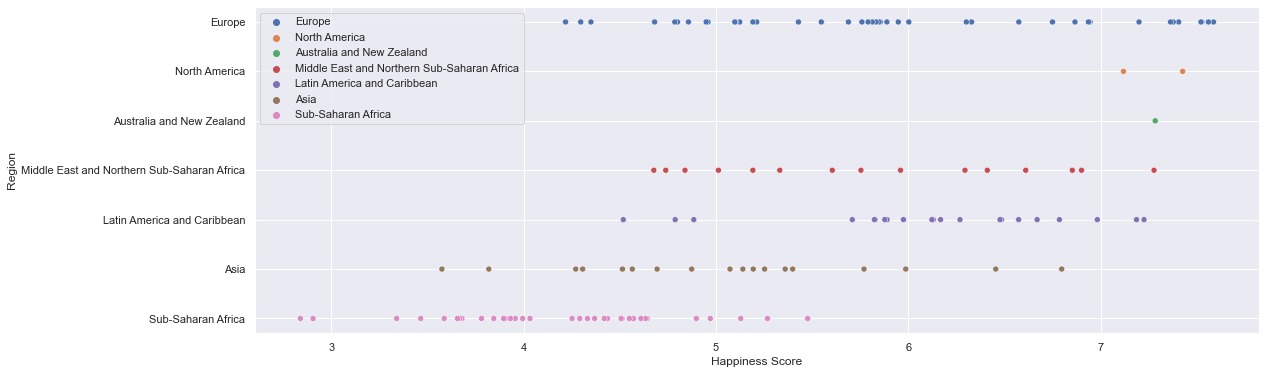

In [1321]:
sns.set(rc={"figure.figsize": (18,6)})

HAPPY_SCATTER=sns.scatterplot(x="Happiness Score", y="Region",hue="Region", data=dff,size_order=(2,20),size_norm=(2,50))
plt.legend(loc='best')

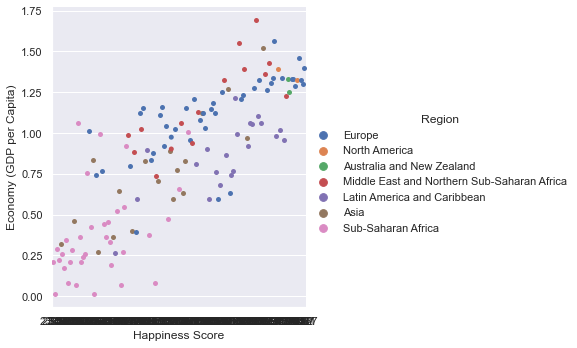

In [1322]:
sns.set(rc={"figure.figsize": (25,20)})
GDP_SCATTER=sns.catplot(data=dff, y='Economy (GDP per Capita)', x="Happiness Score",hue="Region")

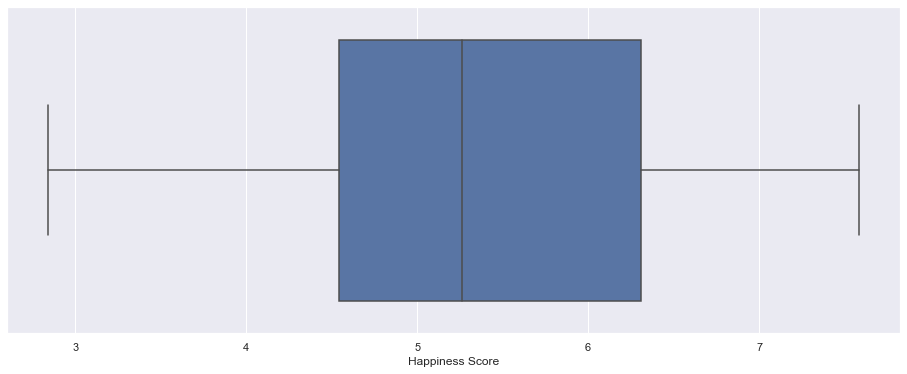

In [1325]:
sns.set(rc={"figure.figsize": (16,6)})
HAPPY_boxplot=sns.boxplot(x="Happiness Score", data=dff)

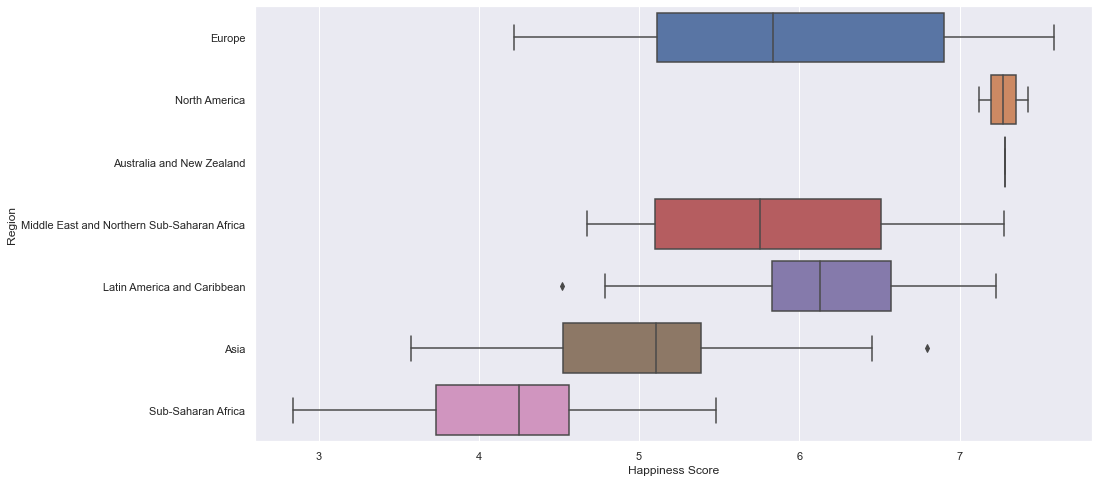

In [1327]:
sns.set(rc={"figure.figsize": (15,8)})
REGIONS_SCATTER=sns.boxplot(x="Happiness Score", y="Region", data=dff)

In [1331]:
HAPPYNESS.figure.savefig('Images/HAPPYNESS.png', dpi=1000)
SUICIDE.figure.savefig('Images/SUICIDE.png', dpi=1000)
FREEDOM.figure.savefig('Images/FREEDOM.png', dpi=1000)
ECONOMY.figure.savefig('Images/ECONOMY.png', dpi=1000)
REGIONHAPPY.figure.savefig('Images/REGIONHAPPY.png', dpi=1000)
HAPPY_SCATTER.figure.savefig('Images/HAPPY_SCATTER.png', dpi=1000)
GDP_SCATTER.figure.savefig('Images/GDP_SCATTER.png', dpi=1000)
HAPPY_boxplot.figure.savefig('Images/HAPPY_boxplot.png', dpi=1000)
REGIONS_SCATTER.figure.savefig('Images/REGIONS_SCATTER.png', dpi=1000)
HEATMAP.figure.savefig('Images/HEATMAP.png', dpi=1000)